In [73]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from scipy.sparse import hstack
!pip install contractions
import contractions
import regex as re
import pickle
nltk.download("wordnet")
nltk.download("omw-1.4")
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [74]:
train_df = pd.read_csv("../input/harsh-comment-classification/train.csv")
test_df = pd.read_csv("../input/harsh-comment-classification/test.csv")

In [75]:
test_df.head()

,id,text
0,e0ae9d9474a5689a5791,in an interview before his execution
1,b64a191301cad4f11287,He knew what he was doing. The below posts are...
2,5e1953d9ae04bdc66408,Zzzzzzz... youre a real bore. Now go bore some...
3,23128f98196c8e8f7b90,"""\n\nYet, it remains confusion because the 910..."
4,2d3f1254f71472bf2b78,I was referring to them losing interest in van...


In [76]:
train_df.head()

,id,text,harsh,extremely_harsh,vulgar,threatening,disrespect,targeted_hate
0,a8be7c5d4527adbbf15f,""", 6 December 2007 (UTC)\nI am interested, not...",0,0,0,0,0,0
1,0b7ca73f388222aad64d,I added about three missing parameters to temp...,0,0,0,0,0,0
2,db934381501872ba6f38,SANDBOX?? \n\nI DID YOUR MADRE DID IN THE SANDBOX,1,0,0,0,0,0
3,228015c4a87c4b1f09a7,"why good sir? Why? \n\nYou, sir, obviously do ...",1,0,1,1,1,0
4,b18f26cfa1408b52e949,"""\n\n Source \n\nIncase I forget, or someone e...",0,0,0,0,0,0


In [77]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89359 entries, 0 to 89358
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               89359 non-null  object
 1   text             89359 non-null  object
 2   harsh            89359 non-null  int64 
 3   extremely_harsh  89359 non-null  int64 
 4   vulgar           89359 non-null  int64 
 5   threatening      89359 non-null  int64 
 6   disrespect       89359 non-null  int64 
 7   targeted_hate    89359 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 5.5+ MB


In [78]:
test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38297 entries, 0 to 38296
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      38297 non-null  object
 1   text    38297 non-null  object
dtypes: object(2)
memory usage: 598.5+ KB


In [79]:
train_df_text = train_df["text"].tolist()
test_df_text = test_df["text"].tolist()

In [80]:
!pip install contractions
import contractions
train_df_text_list = []
test_df_text_list = []

for line in train_df_text:
    train_df_text_list.append(line)

for line in test_df_text:
    test_df_text_list.append(line)
    

for i in range(len(train_df_text_list)):
    expanded_words = []
    for word_in_line in train_df_text_list[i].split():
        try:
            expanded_words.append(contractions.fix(word_in_line))
        except:
            expanded_words.append(" ")
    expanded_text = ' '.join(expanded_words)
    train_df_text_list[i] = expanded_text

for i in range(len(test_df_text_list)):
    expanded_words = []
    for word_in_line in test_df_text_list[i].split():
        try:
            expanded_words.append(contractions.fix(word_in_line))
        except:
            expanded_words.append(" ")
    expanded_text = ' '.join(expanded_words)
    test_df_text_list[i] = expanded_text

In [81]:

train_df_text_list[2]

'SANDBOX?? I DID YOUR MADRE DID IN THE SANDBOX'

In [82]:
columns = ["harsh", "extremely_harsh", "vulgar", "threatening", "disrespect", "targeted_hate"]

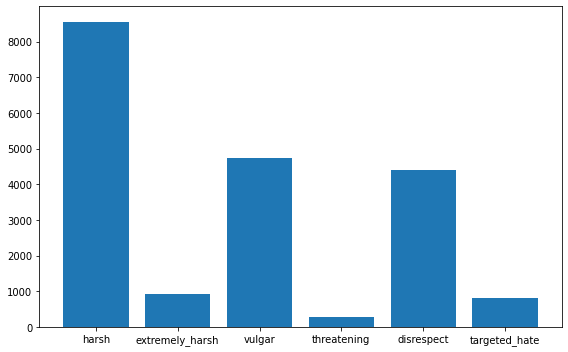

In [83]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [8.00, 5.00]
plt.rcParams["figure.autolayout"] = True
columns = ["harsh", "extremely_harsh", "vulgar","threatening", "disrespect", "targeted_hate"]
data = [train_df["harsh"].sum(), train_df["extremely_harsh"].sum(), train_df["vulgar"].sum(), train_df["threatening"].sum(), train_df["disrespect"].sum(), train_df["targeted_hate"].sum()]
plt.bar( columns, data)
plt.show()

In [84]:
for i in range( len(train_df_text_list)):
    train_df_text_list[i]= train_df_text_list[i].lower()
train_df_text_list[2]
  
for i in range( len(test_df_text_list)):
    test_df_text_list[i]= test_df_text_list[i].lower()
test_df_text_list[2] 

'zzzzzzz... you are a real bore. now go bore someone else. tw*t. 90.231.2.252'

In [85]:
!pip install emot
from emot.emo_unicode import EMOTICONS_EMO

In [86]:
for i in range(len(train_df_text_list)):
    emoticon_removed = train_df_text_list[i]
    for emot in EMOTICONS_EMO:
        emoticon_removed = emoticon_removed.replace(emot, " "+EMOTICONS_EMO[emot].replace(" ","_"))
        train_df_text_list[i] = emoticon_removed
        
for i in range(len(test_df_text_list)):
    emoticon_removed = test_df_text_list[i]
    for emot in EMOTICONS_EMO:
        emoticon_removed = emoticon_removed.replace(emot, " "+EMOTICONS_EMO[emot].replace(" ","_"))
        test_df_text_list[i] = emoticon_removed

In [87]:
train_df_text_list[2677]

'thanks Happy_face_or_smiley and i am ill since the day before yesterday;/ but i am going to be healthy on the day after tommorrow-next week Happy_face_or_smiley and you? alden or talk with alden'

In [88]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [89]:
for i in range(len(train_df_text_list)):
        train_df_text_list[i] = re.sub('[^a-z ?!]+', ' ', train_df_text_list[i])
        train_df_text_list[i] = re.sub(r'\s+', ' ', train_df_text_list[i])
    
for i in range(len(test_df_text_list)): 
        test_df_text_list[i] = re.sub('[^a-z ?!]+', ' ', test_df_text_list[i])
        test_df_text_list[i] = re.sub(r'\s+', ' ', test_df_text_list[i])

In [90]:
train_df_text_list[0]

' december utc i am interested not in arguing but in the policies which resolve our ongoing content dispute also see wikipedia wikiproject united states presidential elections for what i will be working on also the moneybomb closer just self reverted on two different requests which echoed what i would have requested i will rephrase which i did not see an answer to building on our agreement that moneybomb should not be a redlink given the deletion reversion what should be the outline of the article called moneybomb or should it be submitted for afd again in due time? if the latter see the previous version of however this version will require a detailed answer because any ambiguity will only necessitate clarifying questions appy face smiley '

In [91]:
train_num_removed = []
for i in range(len(train_df_text_list)):
    train_num_removed = ' '.join(s for s in train_df_text_list[i].split() if not any(c.isdigit() for c in s))
    train_df_text_list[i] = train_num_removed
    
test_num_removed = []
for i in range(len(test_df_text_list)):
    test_num_removed = ' '.join(s for s in test_df_text_list[i].split() if not any(c.isdigit() for c in s))
    test_df_text_list[i] = test_num_removed    
    

In [92]:
for i in range(len(train_df_text_list)):
     train_df_text_list[i] = re.sub(r'\s+', ' ',train_df_text_list[i])
        
for i in range(len(test_df_text_list)):
     test_df_text_list[i] = re.sub(r'\s+', ' ',test_df_text_list[i])

In [93]:
train_df_text_list[0]

'december utc i am interested not in arguing but in the policies which resolve our ongoing content dispute also see wikipedia wikiproject united states presidential elections for what i will be working on also the moneybomb closer just self reverted on two different requests which echoed what i would have requested i will rephrase which i did not see an answer to building on our agreement that moneybomb should not be a redlink given the deletion reversion what should be the outline of the article called moneybomb or should it be submitted for afd again in due time? if the latter see the previous version of however this version will require a detailed answer because any ambiguity will only necessitate clarifying questions appy face smiley'

In [94]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [95]:
stop_words = set(stopwords.words('english'))
stop_words.add("http")
stop_words.add("https")
stop_words.add("www")

train_stopw_removed = []
for i in range(len(train_df_text_list)):
    train_stopw_removed = [word for word in train_df_text_list[i].split() if word not in stop_words]
    train_stopw_removed_join = ' '.join(train_stopw_removed)
    train_df_text_list[i] = train_stopw_removed_join
    
test_stopw_removed = []
for i in range(len(test_df_text_list)):
    test_stopw_removed = [word for word in test_df_text_list[i].split() if word not in stop_words]
    test_stopw_removed_join = ' '.join(test_stopw_removed)
    test_df_text_list[i] = test_stopw_removed_join

In [96]:
train_df_text_list[0]

'december utc interested arguing policies resolve ongoing content dispute also see wikipedia wikiproject united states presidential elections working also moneybomb closer self reverted two different requests echoed would requested rephrase see answer building agreement moneybomb redlink given deletion reversion outline article called moneybomb submitted afd due time? latter see previous version however version require detailed answer ambiguity necessitate clarifying questions appy face smiley'

In [97]:
from nltk.corpus import wordnet

In [98]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def get_wordnet_pos(word):
    tag = word[0]
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag)


for i in range(len(train_df_text_list)):
    line = train_df_text_list[i]
    tok_list = nltk.pos_tag(nltk.word_tokenize(line))
    pos_final = list(map(lambda x: (x[0], get_wordnet_pos(x[1])),tok_list ))
    train_lemma_line = []
    for word, tag in pos_final:
        if tag is None:
            train_lemma_line.append(word)
        else:
            train_lemma_line.append(lemmatizer.lemmatize(word, tag))
    lemma_line = " ".join(train_lemma_line)
    train_df_text_list[i] = lemma_line

for i in range(len(test_df_text_list)):
    line = test_df_text_list[i]
    tok_list = nltk.pos_tag(nltk.word_tokenize(line))
    pos_final = list(map(lambda x: (x[0], get_wordnet_pos(x[1])),tok_list ))
    test_lemma_line = []
    for word, tag in pos_final:
        if tag is None:
            test_lemma_line.append(word)
        else:
            test_lemma_line.append(lemmatizer.lemmatize(word, tag))
    lemma_line = " ".join(test_lemma_line)
    test_df_text_list[i] = lemma_line

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [99]:
train_df_text_list[0]

'december utc interested argue policy resolve ongoing content dispute also see wikipedia wikiproject united state presidential election work also moneybomb closer self revert two different request echoed would request rephrase see answer build agreement moneybomb redlink give deletion reversion outline article call moneybomb submit afd due time ? latter see previous version however version require detail answer ambiguity necessitate clarify question appy face smiley'

In [100]:
temp_store = pd.DataFrame()
temp_store.insert(0,"id",train_df["id"].tolist())
temp_store.insert(1,"comment",train_df_text_list)
temp_store.to_csv('train.csv',index=None)
temp_store1 = pd.DataFrame()
temp_store1.insert(0,"id",test_df["id"].tolist())
temp_store1.insert(1,"comment",test_df_text_list)
temp_store1.to_csv('test.csv',index=None)

text vectorization

In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer
word_vectorizer = TfidfVectorizer(  strip_accents = 'unicode',
                                    analyzer = 'word', 
                                    stop_words = 'english',
                                    ngram_range = (1, 2),  
                                    min_df = 2,
                                    max_df = 0.5) 
word_vectorizer.fit(train_df_text_list+test_df_text_list)

train_word_features = word_vectorizer.transform(train_df_text_list)

test_word_features = word_vectorizer.transform(test_df_text_list)

In [102]:
print(train_word_features.shape)

(89359, 410996)


In [103]:
from sklearn.feature_extraction.text import TfidfVectorizer
word_vectorizer = TfidfVectorizer(  strip_accents = 'unicode',
                                    analyzer = 'char',
                                    ngram_range = (2, 6),  
                                    min_df = 2,
                                    max_df = 0.5) 
word_vectorizer.fit(train_df_text_list+test_df_text_list)

train_char_features = word_vectorizer.transform(train_df_text_list)

test_char_features = word_vectorizer.transform(test_df_text_list)

In [104]:
print(train_char_features.shape)

(89359, 1140493)


In [106]:
from scipy.sparse import hstack
train_dfjoin = hstack([train_word_features,train_char_features])
test_dfjoin = hstack([test_word_features,test_char_features])
print(train_dfjoin.shape)

(89359, 1551489)


In [108]:
lst = []
lst = test_df["id"].tolist()
prediction_df_lst = pd.DataFrame()
prediction_df_lst.insert(0, "id", lst)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

model = LogisticRegression(class_weight = 'balanced',max_iter= 3500)
l = 1
for i in columns:
    
    x_train_lst = train_dfjoin
    y_train_lst = train_df[i].to_numpy()
    model.fit(x_train_lst, y_train_lst)
    pickle.dump(model,open(i+"logistic.pkl",'wb'))
    y_prediction = model.predict_proba(test_dfjoin)[:, 1]
    prediction_df_lst.insert(l,i,y_prediction)
    l= l + 1
    
prediction_df_lst.to_csv('logistic3.csv', index=None)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
Naive_bayes = MultinomialNB()
l=1
for i in columns:
    
    x_train_lst = train_dfjoin
    y_train_lst =  train_df[i].to_numpy()
    Naive_bayes.fit(x_train_lst, y_train_lst)
    pickle.dump(Naive_bayes, open(i+"naive.pkl", 'wb'))
    y_prediction = Naive_bayes.predict_proba(test_dfjoin)[:, 1]
    prediction_df_lst.insert(l,i,y_prediction)
    l=l+1
prediction_df_lst.to_csv('bayes.csv', index = None)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(max_features = 4000, max_depth = 100, min_samples_split = 10, criterion = 'gini', n_estimators = 120, min_weight_fraction_leaf = 0.0, max_leaf_nodes = None)
l = 1
for i in columns:
    
    x_train_lst = train_dfjoin
    y_train_lst =  train_df[i].to_numpy()
    RFC.fit(x_train_lst, y_train_lst)
    pickle.dump(RFC, open(i+"rfc.pkl", 'wb'))
    y_prediction = RFC.predict_proba(test_dfjoin)[:, 1]
    prediction_df_lst.insert(l,i,y_prediction)
    l=l+1
prediction_df_lst.to_csv('rfc.csv', index = None) 

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.calibration import CalibratedClassifierCV

model = make_pipeline(StandardScaler(with_mean=False), SGDClassifier(loss='hinge',max_iter=1000, tol=1e-3))

l =1
for i in columns:
    
    x_train_lst = train_dfjoin
    y_train_lst =  train_df[i].to_numpy()
    model.fit(x_train_lst, y_train_lst)
    
    calibrator = CalibratedClassifierCV(model, cv='prefit')
    
    model1 = calibrator.fit(x_train_lst, y_train_lst)
    
    pickle.dump(model1, open(i+"_SGDC.pkl", 'wb'))
    y_prediction = model1.predict_proba(test_dfjoin)[:, 1]
    prediction_df_lst.insert(l,i,y_prediction)
    l = l+1
    
prediction_df_lst.to_csv('sgdc.csv', index = None) 

In [ ]:
from sklearn.linear_model import RidgeClassifier

In [110]:
import pickle
import xgboost as xgb

model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
l = 1
for i in columns:
    
    x_train_lst = train_dfjoin
    y_train_lst =  train_df[i].to_numpy()
    model.fit(x_train_lst, y_train_lst)
    pickle.dump(model, open(i+"_XGBoosting.pkl", "wb"))
    y_prediction = model.predict_proba(test_dfjoin)[:, 1]
    prediction_df_lst.insert(l,i,y_prediction)
    l = l+1
    
prediction_df_lst.to_csv('xgb.csv', index = None) 


KeyboardInterrupt: 